## 语言模型

---

### 介绍

首先，我们来思考这样一个问题：随便给你一句话，如何判断这句话像不像一句人话？语言模型要解决的其实就是这个问题：判断出现的语句是否像自然语言，或者说像人话的概率是多大。在早期，我们应用一些语法规则来判断语句的合理性，后来，我们基于统计、基于神经网络来判断。本实验中主要讲解基于统计的语言模型。

#### 知识点

- N-gram 模型
- 困惑度
- 基于 N-gram 模型的文本评估
- N-gram 模型的平滑
- 基于 N-gram 模型的文本生成
- 基于统计的语言模型的缺陷

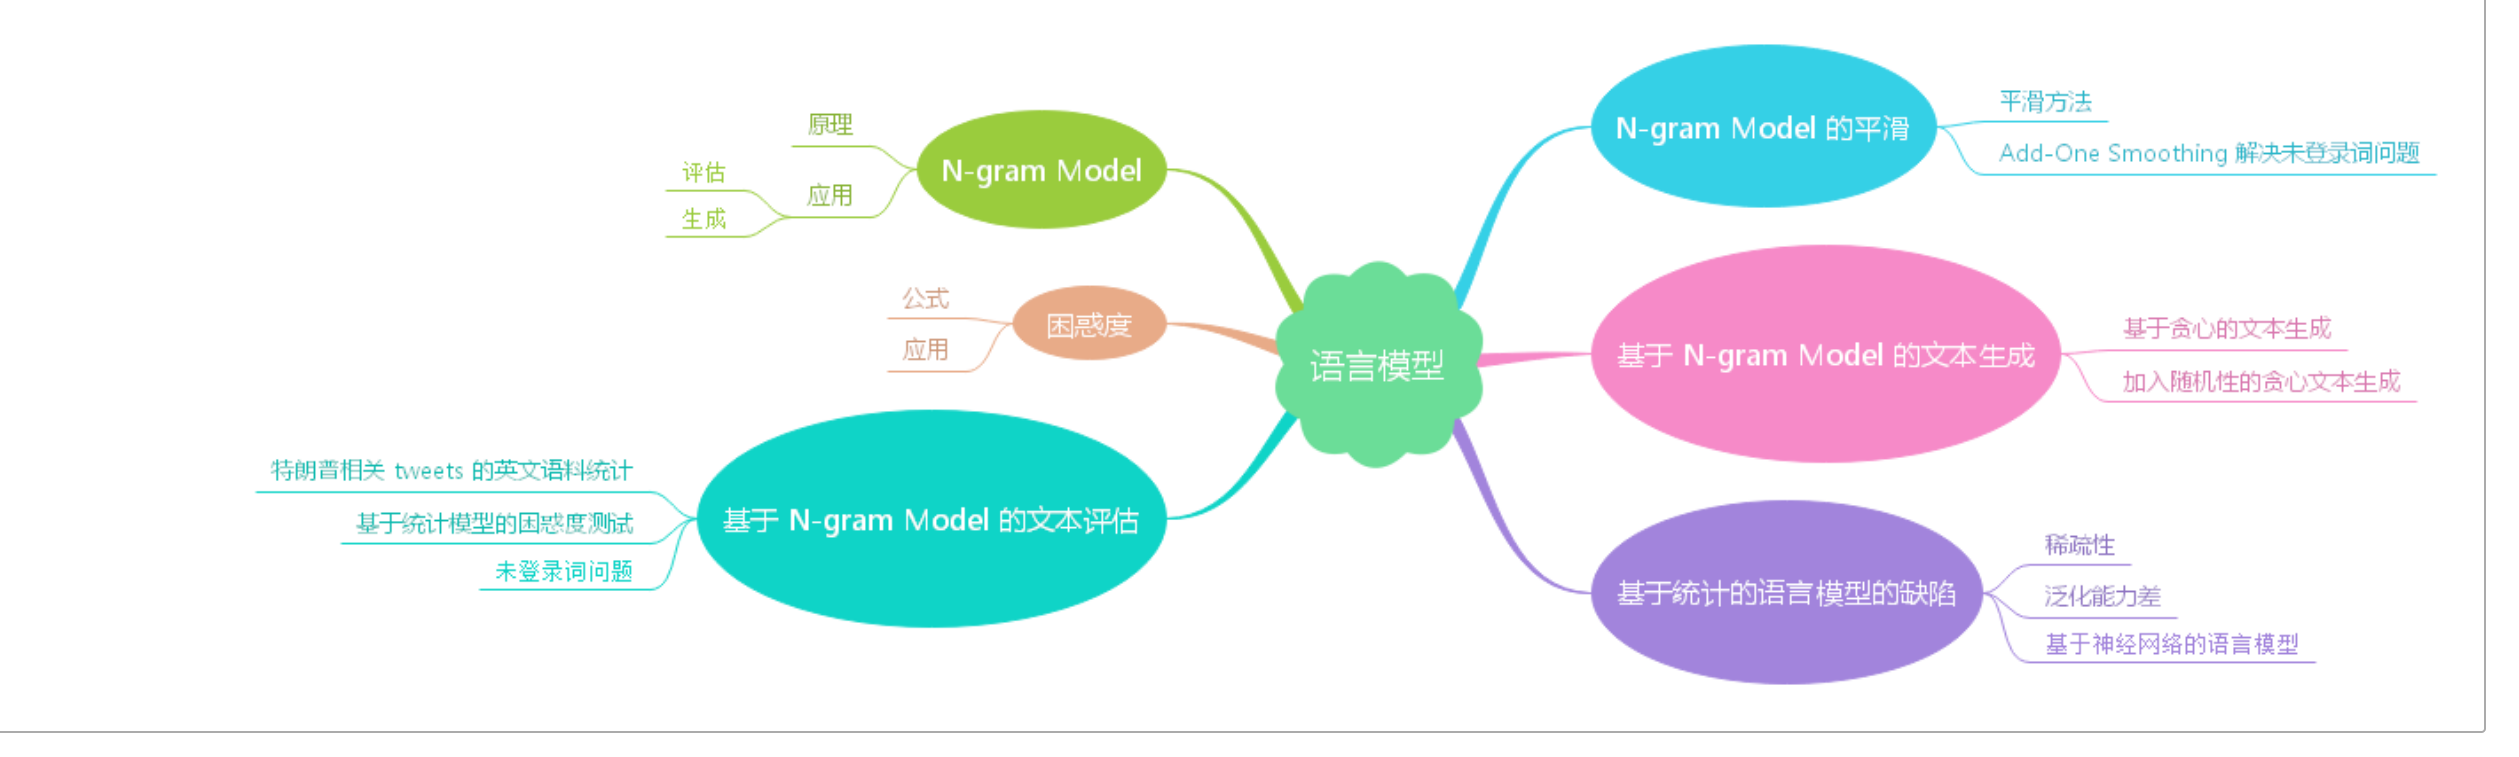

### N-gram 模型介绍

由于自然语言本身的多样性以及丰富性，在时间、空间上的演化，我们很难用人为规约的语法规则来简单地判断语句是否合理。比如有这样一首诗：“螃蟹在剥我的壳，笔记本在写我。漫天的我落在枫叶上雪花上，而你在想我”，全诗来看，多处不符合语言规则，却不失为一首好诗。而基于统计的语言模型，从大数据的角度出发，根据大量语料的出现规律来判断当前的话语是否合理，计算话语作为自然语言出现的可能性，是一种更为可行的方式。

假设现在我们手头有一个巨大的语料库，涵盖了古今中外所有出现过的中文语句，现在给定一个句子 S，由 n 个单词构成：$w_1 w_2 w_3 ... w_n$，那么， $P(S) = P(w_1; w_2; w_3; ... w_n)$ 即表示此句子作为人话出现的可能性。如何来计算这一概率呢？一个简单的想法便是：来看看我们的语料库中有没有出现过这个句子，假如有，出现过多少次，根据出现的次数多少，可以大致判断这句话的“人话程度”。

以上方案听上去挺符合逻辑，但仔细一想，存在一些漏洞：假如这句话又是一句类似以上三行诗的表达新颖并且闻所未闻的语句呢？出现概率为零，然而却是一句精妙的语言；另一方面，我们实际上不大可能具备一个覆盖完全的中文语料库，可能手头有十几 G 的语料便已经很不错了，因此任意给定一个句子，有可能没在语料出现过。这种方案不可行的本质在于，句子的粒度太大，所以换个思路，不妨去统计句子中的词组在语料中的出现频次，这是一种更为灵活的方式，这就是 N-gram 模型（中文称作 N 元文法模型）的基本思想。

从数学的角度说，该模型基于这样一种假设，第 N 个词的出现只与前面 N-1 个词相关，而与其它任何词都不相关，整句的概率就是各个词出现的条件概率的乘积，当 N 为几的时候，便称为几元模型。下面给出一元模型，二元模型，三元模型的定义：

- 当 N=1, 为一元模型（Uni-gram Model)， 即单独计算每个单词的出现概率并累乘 ：  

$$P(w_1,w_2,...w_n)=\prod_{i=1}^n{P(w_i)}$$

- 当 N=2, 为二元模型（Bi-gram Model)，即计算每个单词在前一个单词出现时出现的条件概率并累乘 ：    

$$P(w_1,w_2,...w_n)=\prod_{i=1}^n{P(w_i|w_{i-1})}$$

- 当 N=3, 为三模型（Tri-gram Model)，即计算每个单词在前两个单词出现时出现的条件概率并累乘 ：    

$$P(w_1,w_2,...w_n)=\prod_{i=1}^n{P(w_i|w_{i-2},w_{i-1})}$$

注：常用的是二元或三元模型。

举个例子，对“螃蟹在剥我的壳”应用 Bi-gram model 计算概率。首先，分词后的句子为“螃蟹/在/剥/我/的/壳”，则有：  

$$P(螃蟹，在，剥，我，的，壳)=P(在|螃蟹)*P(剥|在)*P(我|剥)*P(的|我)*P(壳|的)$$

对于某一项条件概率，如何计算呢？根据贝叶斯定理，在语料库中进行相关的计数即可，例如：

$$P(在|螃蟹)=Count(螃蟹,在)/Count(螃蟹)$$

现在我们基本了解了如何基于统计的方式构建 N 元文法语言模型，并且依此判断句子的合理程度，到了这里，可能很多同学还是有些困惑，结合现实场景，这语言模型到底有什么具体的应用呢？其实语言模型的应用方向大致可分为两类：


- 文本评估：这就是一开始所说的判断句子合理性，具体地，在一些由机器生成话语的场景中，如机器翻译、聊天系统、文本摘要等，可以基于语言模型判断生成的句子是否可用。
- 文本生成：既然在语言模型中，我们可以知道某个单词在某 N 个单词后面出现的概率，那么，给定前面的单词，我们可以基于贪心的策略，即取概率最大的后一个词，来生成短语或者文本。常见的应用有，搜索引擎（ Google 或者 Baidu ）、或者输入法的猜想或提示。比如，在用谷歌时，输入一个或几个词，搜索框通常会以下拉菜单的形式给出几个可能的后接备选项，这些备选其实是在猜想你想要搜索的那个词串。

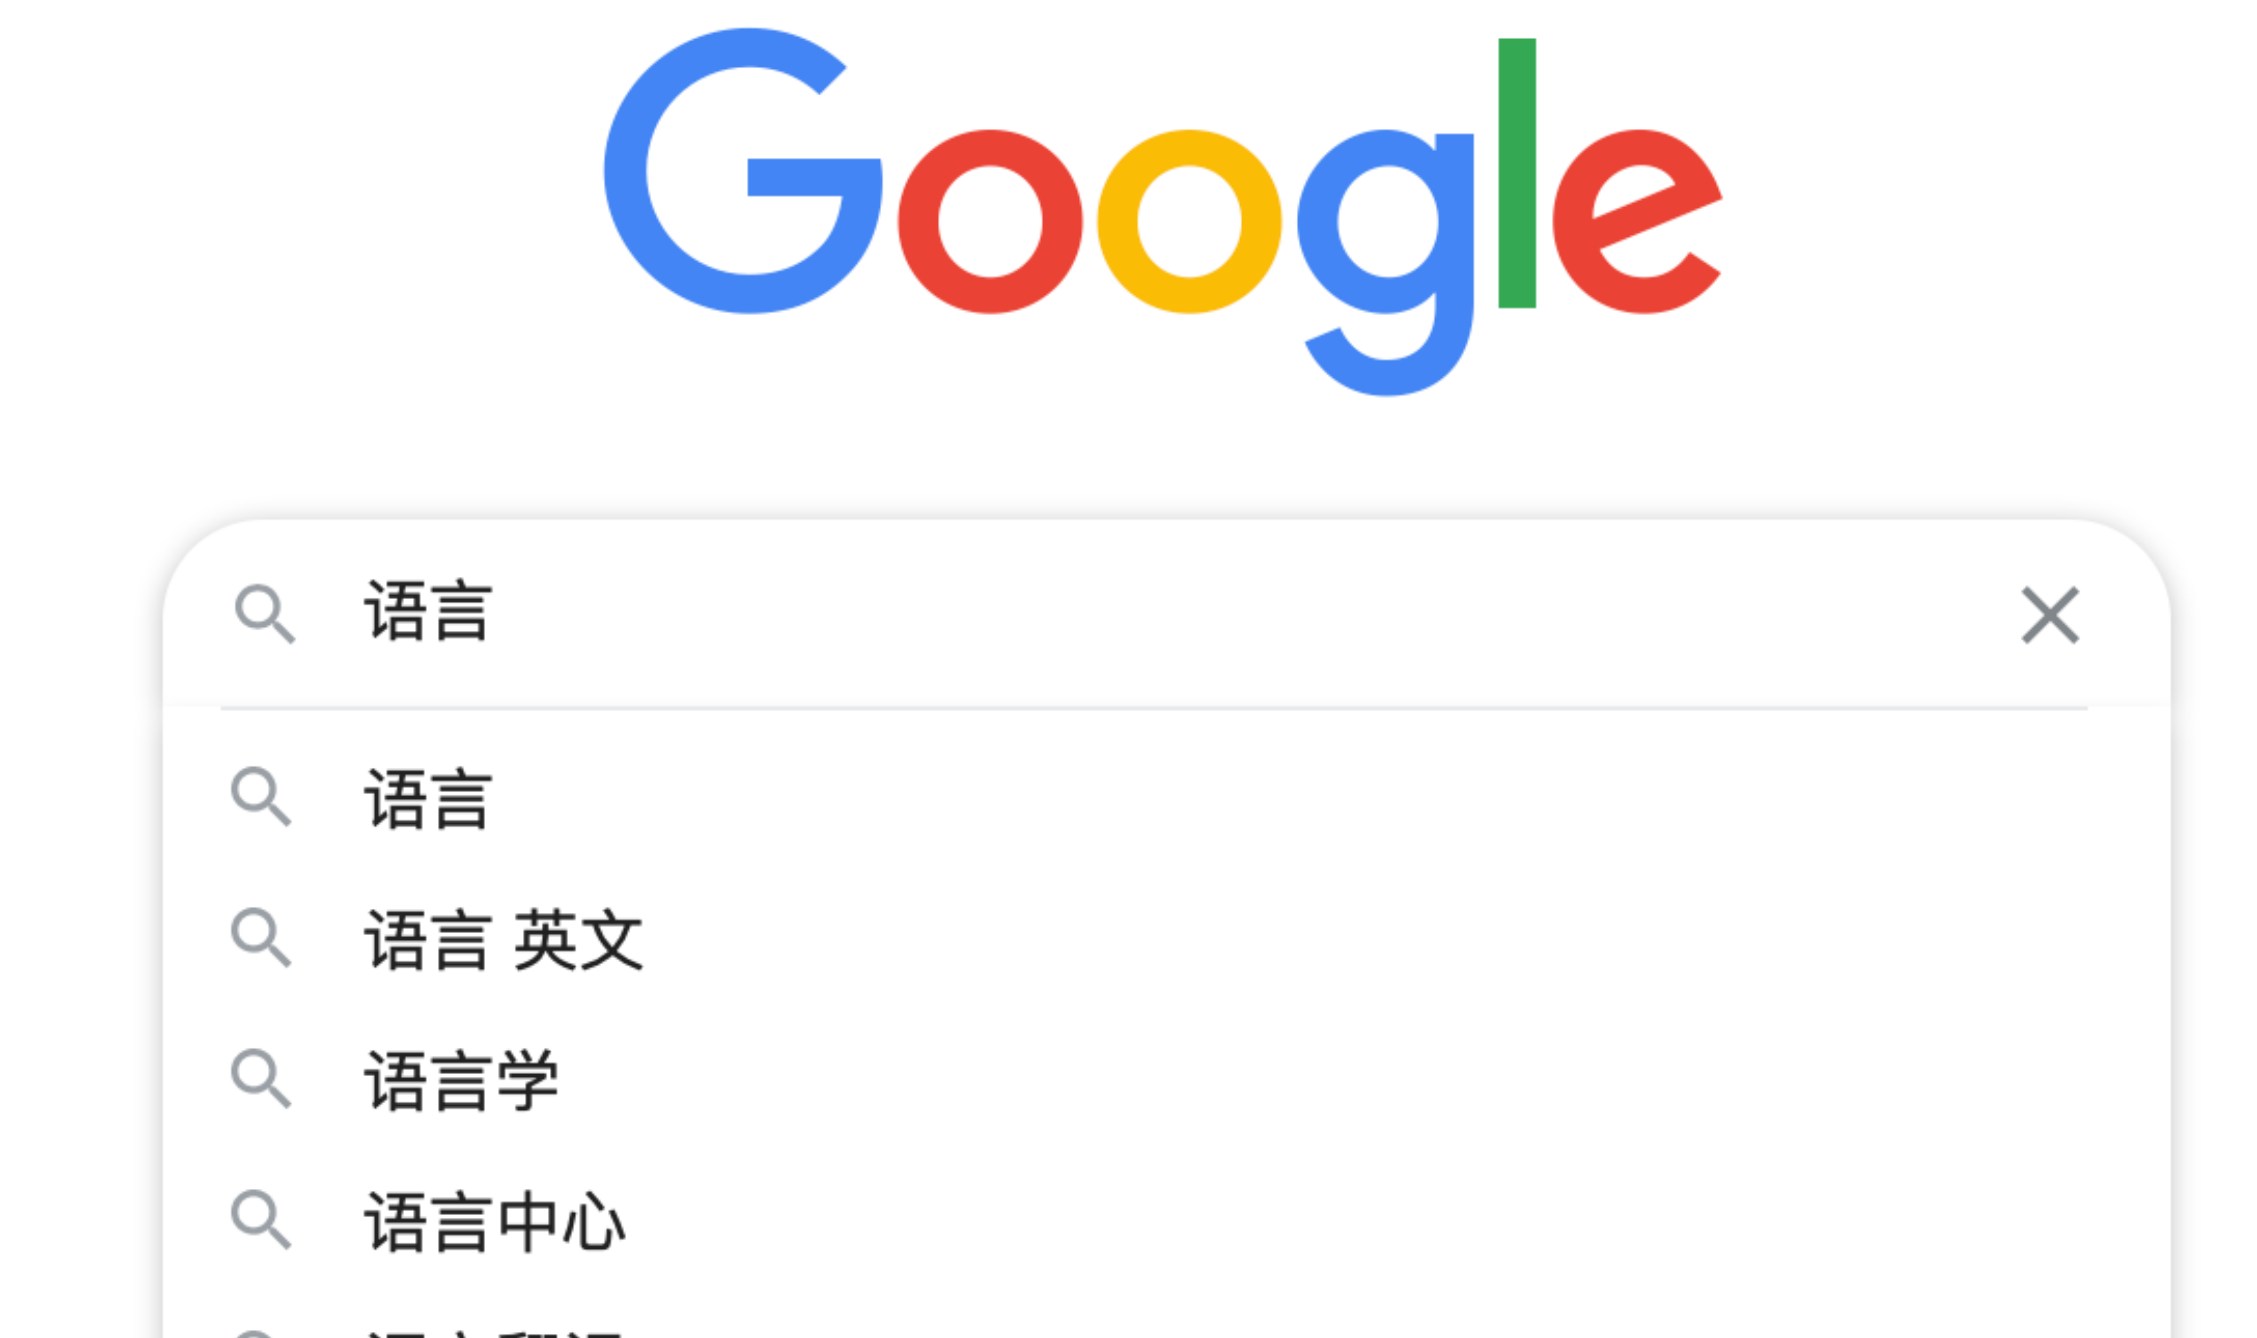

### 困惑度

基于不同的语料，实际上我们可以统计出不同的语言模型，那么，如何评估这些语言模型的优劣呢？这里就要说到 Perplexity （简称为PPL）的概念，即在自然语言处理领域中衡量语言模型好坏的指标，它的主要原理是估计一句话 s 出现的概率，并用句子长度 N 作归一化，对一批句子 S 计算困惑度，公式如下：  

$$PPL(S)=2^{\sum{-\frac{1}{N}logP(s)}}$$

可知，当句子出现概率越高，困惑度便越低。因此，对于不同语料或者不同方式训练出的语言模型，只要准备好测试集（即是正常自然语言的文本），根据不同的模型来计算这些文本的困惑度，这些文本所得的平均困惑度越低，说明对应的语言模型越好。

在这里，大家可能会有一个疑惑，为什么要用困惑度来表示句子的合理性呢，而非关于句子的概率表达式 $P(s)$，直接取测试集的所有句子出现概率的平均值为什么不行呢？这里原因有二：  

- 多个条件概率连乘操作容易造成下溢，因此要取对数。
- 从数学的角度而言，困惑度是基于熵所推导出的公式，可认为是 average branch factor（平均分支系数），所计算出的值表示预测下一个词时可以有多少种选择。在模型生成下一个词时可选词数越少，可大致认为模型随机性越低，越准确（设想一种极端情况，每个词后面可接所有词典中的词并且概率相等，那么此语言模型和随机生成便无区别了）。这个角度也能解释，为什么 PPL 越小模型就越好。

事实上，对于建立好某个语言模型之后，我们也常常用困惑度来衡量单个句子的合理性，即文本评估。

### N-gram 模型的文本评估

接下来，我们基于一个美国前总统特朗普相关 tweets 的英文语料，来构建一个 Bi-gram Model，并且用它来实现对任意输入句子的合理性评估。

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 教学代码：</i>

In [ ]:
import pandas as pd
df = pd.read_csv(
    'https://labfile.oss.aliyuncs.com/courses/3205/tweets.csv')  # 读取数据
df.head()  # 数据形式如下，text 所在列即为文本数据

<i class="fa fa-arrow-circle-down" aria-hidden="true"> 动手练习：</i>

对文本做一些基本的预处理，比如统一格式，去除特殊符号并且切分为词汇的形式。

In [ ]:
import re
import unicodedata


def basic_clean(text):
    # 定义一个函数用于文本的预处理
    text = (unicodedata.normalize('NFKD', text)  # 将文本统一表示为规范形式
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    # 去除文本中的一些特殊符号并且分词后返回列表
    # \w 表示字母数字字符，\s 表示空格字符，[^\w\s] 表示除以上两类字符以外的字符
    words = re.sub(r'[^\w\s]', '', text).split()
    return words

In [ ]:
# 例：
text = ";'//i love @this film"
print(basic_clean(text))

对所有 tweets 进行处理:

In [ ]:
# 将所有文本进行预处理
# 将 Dataframe 中的所有数据取出并合并为一整个 str，再进行预处理
words = basic_clean(''.join(str(df['text'].tolist())))
words[:10]  # 查看数据形式

应用 NLTK 中的计数功能进行一元（计算二元模型时也要用到一元词频信息）、二元计数并且根据频次排序。

In [ ]:
import nltk
unigrams = (pd.Series(nltk.ngrams(words, 1)).value_counts())
bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())

事实上，二元词组的统计信息也能帮助分析文本数据，可视化特朗普相关 tweets 的英文语料中的 top10 Bi-gram，你能发现什么规律吗？

In [ ]:
import matplotlib.pyplot as plt
bigrams_top10 = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
bigrams_top10.sort_values().plot.barh(color='pink', width=.9, figsize=(12, 8))
plt.title('10 Most Frequently Occuring Bi-gram')
plt.ylabel('Bi-gram')
plt.xlabel('# of Occurances')

接下来，根据输入的句子以及以上一元、二元计数信息设计一个计算困惑度的函数。

In [ ]:
import numpy as np
import math


def compute_sentence_ppl_by_unigram(sentence, unigrams, bigrams):
    # unigrams, bigrams 分别存放了某个单词或者某对单词的出现频次
    sentence_bigram = list(nltk.ngrams(
        basic_clean(sentence), 2))  # 获取输入句子中所有的 bigram
    probs = []
    for gram in sentence_bigram:
        count_bigram = bigrams[gram]  # 两个单词共现的频次 ,即 count(word_pre,word_after)
        count_unigram = unigrams[(gram[0],)]  # 前面单词单独出现的频次， 即 count(word_pre)
        # 两者相除即为条件概率 p(word_after|word_pre) = count(word_pre,word_after)/count(word_pre)
        probs.append(count_bigram/count_unigram)
    len_sentence = (len(sentence_bigram)+1)  # 计算句子长度
    sentence_ppl = math.pow(2, (-1/len_sentence) *
                            np.sum(np.log(probs)))  # 根据公式计算整个句子的困惑度
    return sentence_ppl

进行困惑度测试：

In [ ]:
sentence1 = "he is a loser"
sentence2 = "he is a man"
sentence1_ppl = compute_sentence_ppl_by_unigram(sentence1, unigrams, bigrams)
sentence2_ppl = compute_sentence_ppl_by_unigram(sentence2, unigrams, bigrams)
# sentence1 的困惑度稍高于 sentence2，说明基于此语料的二元语言模型认为后者更像是一句自然语言
print("sentence1_ppl:", sentence1_ppl)
print("sentence2_ppl:", sentence2_ppl)

对于以上函数 `compute_sentence_ppl_by_unigram()`，比较通俗但冗长，还可以将代码写得更精简些，当然你可以根据自己的偏好选择任意一种。

In [ ]:
# 精简版本
def compute_sentence_ppl_by_unigram(sentence, unigrams, bigrams):
    sentence_bigram = list(nltk.ngrams(
        basic_clean(sentence), 2))  # 输入句子中所有的 bigram
    probs = [bigrams[gram]/unigrams[(gram[0],)]
             for gram in sentence_bigram]  # 计算所有 bigram 对应的概率值
    sentence_ppl = math.pow(
        2, (-1/(len(sentence_bigram)+1)*np.sum(np.log(probs))))  # 根据公式计算整个句子的困惑度
    return sentence_ppl

当测试数据中存在未登录词的时候（即语料库中未出现过的单词）或者二元词组时，再调用函数 `compute_sentence_ppl_by_unigram()`，程序报错。

In [ ]:
sentence3 = "Mr Huang is a loser"
sentence3_ppl = compute_sentence_ppl_by_unigram(sentence3, unigrams, bigrams)

### N-gram 模型的平滑

通过以上报错的例子，我们发现了一个问题，即当存在未登录词或者词组的时候，一般的困惑度计算公式无法处理，例如，对于：  

$$P(在|螃蟹)=Count(螃蟹,在)/Count(螃蟹)$$

假如用于构建语言模型的语料库中不存在“螃蟹”，分子 Count(螃蟹) 为零，不合理；即便存在“螃蟹”，如果“螃蟹,在”的搭配不存在，那么 P(在|螃蟹) 为零，之后无法取对数，也不合理。那么，是不是可以将出现这些情况的句子概率默认是零呢？答案是否定的。在一般情况下，我们的语料库并不能代表真实的某种语言的分布，因此不能因为此语料库中不存在此词汇或词组而否决整个句子。

平滑技术便是为了解决此问题，常见的方法有 Add‐One Smoothing、Add‐K Smoothing、Good-Turing Smoothing、Linear Interpolation 等，在这里主要介绍 Add‐One Smoothing 方式，即默认为所有 N-gram 至少会在语料中出现一次，只需要在计算条件概率的时候作一些变化即可。假设 N 为语料中的单词个数（重复计数），V为词典中单词的个数（不重复计数），那么对于 Uni-gram 模型，平滑处理后计算每一项条件概率的公式为:  

$$P(w_i) = \frac{Count(w_i)+1}{N+V}$$

对于 Bi-gram 模型，平滑处理后计算每一项条件概率的公式为:  

$$P(w_i|w_{i-1}) = \frac{Count(w_i,w_{i-1})+1}{Count(w_{i-1})+V}$$

基于以上方式，我们在计算困惑度的函数中加入平滑项。

In [ ]:
def compute_sentence_ppl_by_unigram_smooth(sentence, unigrams, bigrams):
    # unigrams, bigrams 分别存放了某个单词或者某对单词的出现频次
    sentence_bigram = list(nltk.ngrams(
        basic_clean(sentence), 2))  # 获取输入句子中所有的 bigram
    V = len(unigrams)  # 语料库中的单词量
    probs = []
    for gram in sentence_bigram:
        # 两个单词共现的频次 ,即 count(word_pre,word_after)，如果为未登录bigram，记为 0
        count_bigram = bigrams.get(gram, 0)
        # 前面单词单独出现的频次， 即 count(word_pre)，如果为未登录unigram，记为 0
        count_unigram = unigrams.get((gram[0],), 0)
        # 两者相除即为条件概率 p(word_after|word_pre) = count(word_pre,word_after)/count(word_pre)
        probs.append((count_bigram+1)/(count_unigram+V))
    len_sentence = (len(sentence_bigram)+1)  # 计算句子长度
    sentence_ppl = math.pow(2, (-1/len_sentence) *
                            np.sum(np.log(probs)))  # 根据公式计算整个句子的困惑度
    return sentence_ppl

改变获取频次的方式以及加入平滑项后，程序正常运行。

In [ ]:
sentence3 = "Mr Huang is a loser"
sentence3_ppl = compute_sentence_ppl_by_unigram_smooth(
    sentence3, unigrams, bigrams)
print(sentence3_ppl)

In [ ]:
# 精简版本
def compute_sentence_ppl_by_unigram_smooth(sentence, unigrams, bigrams):
    sentence_bigram = list(nltk.ngrams(
        basic_clean(sentence), 2))  # 输入句子中所有的 bigram
    V = len(unigrams)  # 语料库中的单词量
    probs = [(bigrams.get(gram, 0)+1)/(unigrams.get((gram[0],), 0)+V)
             for gram in sentence_bigram]  # 计算所有 bigram 对应的概率值
    sentence_ppl = math.pow(
        2, (-1/(len(sentence_bigram)+1)*np.sum(np.log(probs))))  # 根据公式计算整个句子的困惑度
    return sentence_ppl

### 基于 N-gram 模型的文本生成

除了文本评估，我们还可以基于 N-gram 模型进行文本生成，核心思路很简单：基于前面的单词选取后面最大可能的单词进行生成。因此，首先我们要构建一个词典，即对于语料中的每一个单词，罗列其后面可能出现的单词及其可能性。

In [ ]:
# key 为某一单词，value 为所有可能的后接单词对及其出现频次
word2bigram_count = {}
for bigram in bigrams.keys():
    if bigram[0] in word2bigram_count:
        word2bigram_count[bigram[0]].append((bigram[1], bigrams[bigram]))
    else:
        word2bigram_count[bigram[0]] = [(bigram[1], bigrams[bigram])]

例如，is 后面所接所有可能单词及其在语料库中的出现频次（已排序）：

In [ ]:
word2bigram_count["is"]

接下来，我们基于给定的文本继续往后生成，首先取文本中的最后一个单词作为前一单词进行生成，如果些单词在词库中不存在，则随机选择语料中的某一单词进行生成。

In [ ]:
import random


def generate_sentence_by_bigram(sentence, generate_len, word2bigram_count):
    # generate_len 表示所要继续生成单词的长度，word2bigram_count 存储了每个单词后面所接的可能单词及其频次
    pre_word = basic_clean(sentence)[-1]  # 获取输入句子中最后一个单词作为初始单词
    generate_words = []  # 生成的句子
    for i in range(generate_len):
        if pre_word in word2bigram_count:  # 如果 pre_word 在所统计的语料库中存在
            # 选择 pre_word 后面所接的频次最高的单词作为 next_word
            next_word = word2bigram_count[pre_word][0][0]
        else:  # 如果 pre_word 在所统计的语料库中不存在
            next_word = random.choice(
                list(word2bigram_count.keys()))  # 随机选择一个单词作为 next_word
        generate_words.append(next_word)
        pre_word = next_word
    return sentence + " " + " ".join(generate_words)  # 将原来句子及新生成的单词拼接并返回

In [ ]:
# 例：
sentence4 = "he is"
generate_len = 5
generate_sentence = generate_sentence_by_bigram(
    sentence4, generate_len, word2bigram_count)
print(generate_sentence)

为了让生成的句子更具备灵活性，在生成过程中加入一些随机性。

In [ ]:
def generate_sentence_by_bigram(sentence, generate_len, word2bigram_count, random_prob=0.5):
    # generate_len 表示所要继续生成单词的长度，word2bigram_count 存储了每个单词后面所接的可能单词及其频次
    pre_word = basic_clean(sentence)[-1]  # 获取输入句子中最后一个单词作为初始单词
    generate_words = []  # 生成的句子
    for i in range(generate_len):
        if pre_word in word2bigram_count:  # 如果 pre_word 在所统计的语料库中存在
            if random.random() > random_prob:
                # 选择 pre_word 后面所接的频次最高的单词作为 next_word
                next_word = word2bigram_count[pre_word][0][0]
            else:
                next_words = [i[0]
                              for i in word2bigram_count[pre_word]]  # 获取所有可能的单词
                next_word = random.choice(next_words)
        else:  # 如果 pre_word 在所统计的语料库中不存在
            (list(word2bigram_count.keys()))  # 随机选择一个单词作为 next_word
        generate_words.append(next_word)
        pre_word = next_word
    return sentence + " " + " ".join(generate_words)  # 将原来句子及新生成的单词拼接并返回

In [ ]:
# 例：
sentence4 = "he is"
generate_len = 5
generate_sentence = generate_sentence_by_bigram(
    sentence4, generate_len, word2bigram_count)
print(generate_sentence)

可以看到，以上方式用来生成完整的句子，结果并不理想。在应用中，我们更多的是基于此方式来实现搜索引擎（ 如 Google 或者 Baidu ）、或者输入法的猜想或提示，同时，语料库的规模以及内容也要随着相应的应用进行调整。那么，语言模型就真的不能用来做生成任务了吗？答案是否定的。如今基于大数据大规模神经网络的语言模型甚至能写诗歌、写新闻、写小说，接下来我们对这一部分进行一些了解。

### 基于统计的语言模型的缺陷

基于统计的语言模型 N-gram，是对 N 个连续的单词出现概率进行建模，其假设为：对于一个单词在某个位置出现概率的估计可通过计算该单词与前面 N-1 个单词同时出现频率相对于前面的 N-1 个单词同时出现频率的比值获得，但这种方式存在以下两大缺陷：

- 稀疏性：因为 N-gram 模型只能对文本中出现的单词或者单词组进行建模，当测试文本中出现没有在训练文本中出现的单词或单词组时，无法正确计算这些训练样本中未出现的单词的应有概率（注意，平滑只能减弱但不能从根本上解决稀疏性）。
- 泛化能力差：依赖于固定单词组合，需要完全的模式匹配，否则也无法正确输出单词组出现的概率，即当新的文本中出现意义相近的单词或单词组时，无法进行有效泛化。例如，假设语料中存在一句话“我上班，我快乐”，而测试数据中有一句话“我打工，我高兴”，这句话和“我上班，我快乐”本身意思相近，一个好的语言模型是应该能够识别出后面这句话与前面那句无论从语法还是语义上都是非常近似，应该有近似的概率分布，但是基于统计的模型无法做到这一点。

传统语言模型的上述缺陷使得人们开始把目光转向神经网络模型，期望深度学习技术能够自动化地学习更深层次的语法及语义的特征，解决稀疏性问题，并提高泛化能力。早期用于训练语言模型的神经网络模型有：

- 前馈神经网络模型（FFLM）【解决稀疏性问题】
- 循环神经网络模型（RNNLM）【提高泛化能力，增强对长上下文信息的处理】

而最近几年，基于自注意力机制的语言模型纷纷出现（比如 Bert、GPT 系列等），并且在相当多的下游任务中取得了非常好的效果。值得注意的是，当我们在提到以自注意力机制为基础的一系列语言模型时，“语言模型”本身的含义发生了扩张，它更多地可以认为是一种模型的训练手段，即基于部分词汇预测完整句子作为训练任务，基于大数据来训练出一个预训练语言模型。而其应用也不再是简单的句子评估或生成，可以拼接不同的模型结构以完成更多类型的任务，比如阅读理解、问答、文本分类等等。

### 实验总结

语言模型，个人理解，也可以认为是，如何从机器的角度，来建模并认知语言。其发展历程基本也和自然语言处理的技术发展历史一致，从规则到统计，再从统计到深度学习。本实验主要介绍了关于语言模型的以下知识点：

- N-gram 模型
- 困惑度
- 基于 N-gram 模型的文本评估
- N-gram 模型的平滑
- 基于 N-gram 模型的文本生成
- 基于统计的语言模型的缺陷

在机器输出语言后，我们可以评估是否像一句人话，那么如果出现什么错误，能否自动来识别并纠正呢？在下一实验中，我们将学习自然语言处理中一大基本且应用广泛的任务：文本纠错。